In [13]:
# Load the dplyr package so we can use its functions
library(dplyr)

good_mpg_cars <- filter(mtcars, mpg > 20)

sorted_cars <- arrange(good_mpg_cars, desc(hp))

print(sorted_cars)

                mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Lotus Europa   30.4   4  95.1 113 3.77 1.513 16.90  1  1    5    2
Mazda RX4      21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag  21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4
Hornet 4 Drive 21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1
Volvo 142E     21.4   4 121.0 109 4.11 2.780 18.60  1  1    4    2
Toyota Corona  21.5   4 120.1  97 3.70 2.465 20.01  1  0    3    1
Merc 230       22.8   4 140.8  95 3.92 3.150 22.90  1  0    4    2
Datsun 710     22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1
Porsche 914-2  26.0   4 120.3  91 4.43 2.140 16.70  0  1    5    2
Fiat 128       32.4   4  78.7  66 4.08 2.200 19.47  1  1    4    1
Fiat X1-9      27.3   4  79.0  66 4.08 1.935 18.90  1  1    4    1
Toyota Corolla 33.9   4  71.1  65 4.22 1.835 19.90  1  1    4    1
Merc 240D      24.4   4 146.7  62 3.69 3.190 20.00  1  0    4    2
Honda Civic    30.4   4  75.7  52 4.93 1.615 18.52  1  1    4 

`geom_smooth()` using formula = 'y ~ x'


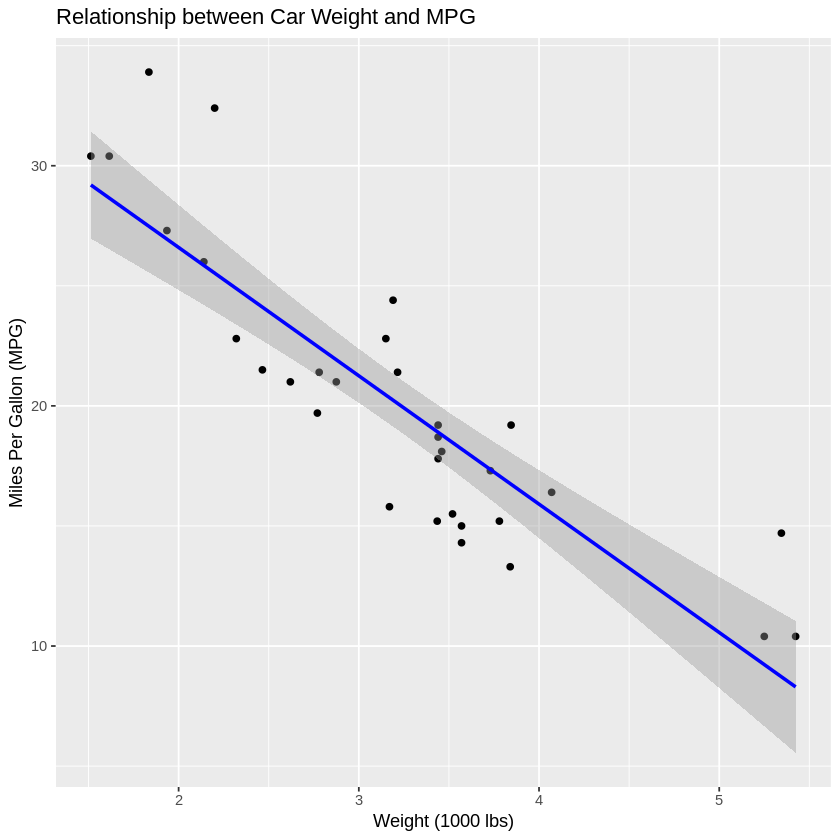

In [17]:
# Load ggplot2 so we can make plots
library(ggplot2)

# Make a scatter plot of car weight vs. mpg
plot <- ggplot(mtcars, aes(x = wt, y = mpg)) +  # wt: weight, mpg: miles per gallon
  geom_point() +                                # Show each car as a dot
  geom_smooth(method = "lm",                    # Add a straight line (regression)
              se = FALSE,                       # Do not show shaded error area
              color = "blue") +                 # Make the line blue
  labs(
    title = "Relationship between Car Weight and MPG", # Plot title
    x = "Weight (1000 lbs)",                           # X-axis label
    y = "Miles Per Gallon (MPG)"                       # Y-axis label
  )

# Show the plot
print(plot)




In [15]:
# Sample numeric vector
sample_data <- c(12, 15, 9, 8, 11, 13, 10, 14)

# Perform one-sample t-test (test if mean is different from 10)
t_test_result <- t.test(sample_data, mu = 10)

# Print the test result
print(t_test_result)


	One Sample t-test

data:  sample_data
t = 1.7321, df = 7, p-value = 0.1269
alternative hypothesis: true mean is not equal to 10
95 percent confidence interval:
  9.452175 13.547825
sample estimates:
mean of x 
     11.5 



In [16]:
# Install caret if not already installed (uncomment the next line if needed)
# install.packages("caret")

# Load caret package for machine learning
library(caret)

# Use mtcars data
data <- mtcars

# Set random seed so results are the same each time
set.seed(123)

# Split the data: 80% for training, 20% for testing
train_rows <- createDataPartition(data$mpg, p = 0.8, list = FALSE)
train_data <- data[train_rows, ]
test_data <- data[-train_rows, ]

# Scale (standardize) the predictor columns using training data
preProc <- preProcess(train_data[, -1], method = c("center", "scale"))
train_scaled <- predict(preProc, train_data[, -1])
test_scaled <- predict(preProc, test_data[, -1])

# Train a linear regression model to predict mpg
model <- train(x = train_scaled, y = train_data$mpg, method = "lm")

# Predict mpg for the test set
predicted_mpg <- predict(model, test_scaled)

# Measure how good the predictions are using RMSE
test_rmse <- RMSE(predicted_mpg, test_data$mpg)
cat("Test RMSE:", test_rmse, "\n")

Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


Test RMSE: 4.808981 


In [18]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
